# Data Loading and Inspection

In [3]:
import pandas as pd

In [4]:
ml_data = pd.read_csv('ML case Study.csv', header = 0)
colleges_data = pd.read_csv('Colleges.csv', header = 0)
cities_data = pd.read_csv('cities.csv', header = 0)

In [5]:
# Cleaning up the column names
ml_data.columns = ml_data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
colleges_data.columns = colleges_data.columns.str.replace(' ', '_')
cities_data.columns = cities_data.columns.str.replace(' ', '_')

In [6]:
ml_data.head()

,College,City,Role,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [7]:
colleges_data.head()

,Tier_1,Tier_2,Tier_3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [8]:
cities_data.head()

,Metrio_City,non-metro_cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [9]:
# Inspection of the data
print(ml_data.head())
print(ml_data.info())
print(ml_data.describe())

             College             City       Role  Previous_CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous_job_change  Graduation_Marks  EXP_Month       CTC  
0                    3                66         19  71406.58  
1                    1                84         18  68005.87  
2                    2                52         28  76764.02  
3                    2                81         33  82092.39  
4                    4                74         32  73878.10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College 

In [10]:
ml_data.isnull().sum()

College                0
City                   0
Role                   0
Previous_CTC           0
Previous_job_change    0
Graduation_Marks       0
EXP_Month              0
CTC                    0
dtype: int64

### Our findings by performing Data Inspection:
- The dataset contains 1589 entries and 8 columns, with no missing values.
- The average CTC is approximately 75,353, ranging from 53,020 to 123,416.
- Categorical variables need encoding for analysis.

In [12]:
ml_data.isnull().sum()

College                0
City                   0
Role                   0
Previous_CTC           0
Previous_job_change    0
Graduation_Marks       0
EXP_Month              0
CTC                    0
dtype: int64

# Handle Categorical Variables

In [14]:
college_mapping = {}

In [15]:
# Fill the mapping dictionary based on colleges_data
for college in colleges_data['Tier_1'].dropna():
    college_mapping[college] = 1
for college in colleges_data['Tier_2'].dropna():
    college_mapping[college] = 2
for college in colleges_data['Tier_3'].dropna():
    college_mapping[college] = 3

In [16]:
# Map the College column in ml_data using the mapping dictionary
ml_data['College'] = ml_data['College'].map(college_mapping)

In [17]:
city_mapping = {}

In [18]:
# Fill the mapping dictionary based on cities_data
for city in cities_data['Metrio_City'].dropna():
    city_mapping[city] = 1
for city in cities_data['non-metro_cities'].dropna():
    city_mapping[city] = 0

In [19]:
# Map the City column in ml_data using the mapping dictionary
ml_data['City'] = ml_data['City'].map(city_mapping)

In [20]:
# Check the results
print(ml_data[['City']].head())

   City
0     0
1     0
2     0
3     0
4     0



- Mapped college names to numerical values based on their tier (1 for Tier 1, 2 for Tier 2, 3 for Tier 3) using the`colleges_dat`.
- Converted city names to binary values (1 for metro cities and 0 for non-metro cities) using th `cities_daa`.

In [22]:
ml_data = pd.get_dummies(ml_data, drop_first = True).astype(int)

- Converted the 'Role' column into integers (1 and 0) as it will be beneficial for the further analysis.

In [24]:
ml_data.head(20)

,College,City,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,CTC,Role_Manager
0,2,0,55523,3,66,19,71406,1
1,2,0,57081,1,84,18,68005,0
2,3,0,60347,2,52,28,76764,0
3,3,0,49010,2,81,33,82092,0
4,1,0,57879,4,74,32,73878,0
5,2,0,54340,4,73,31,59950,0
6,3,1,60298,1,42,46,66602,0
7,2,1,49944,2,56,37,57768,0
8,3,1,53124,4,40,37,70083,0
9,1,0,51141,1,47,60,85648,0


# Data Visualization

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

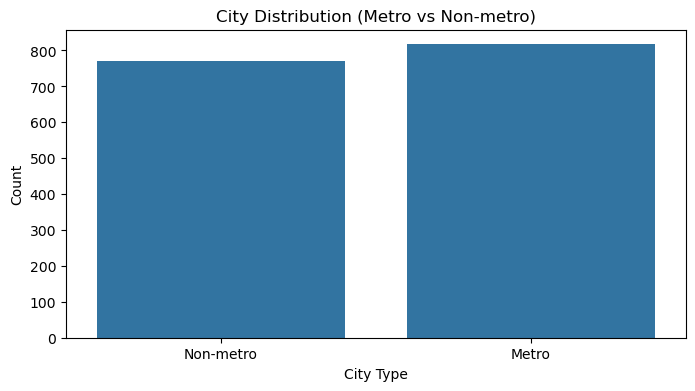

In [27]:
# 1. Bar Chart for City Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=ml_data, x='City')
plt.title('City Distribution (Metro vs Non-metro)')
plt.xlabel('City Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-metro', 'Metro'])
plt.show()

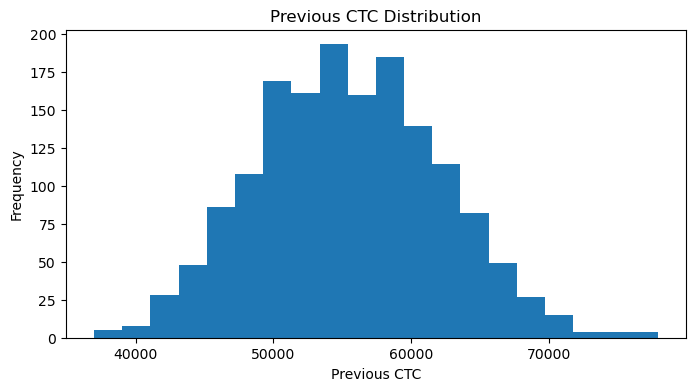

In [28]:
# 2. Histogram for Previous CTC
plt.figure(figsize=(8, 4))
ml_data['Previous_CTC'].plot(kind='hist', bins=20, title='Previous CTC Distribution')
plt.xlabel('Previous CTC')
plt.ylabel('Frequency')
plt.show()

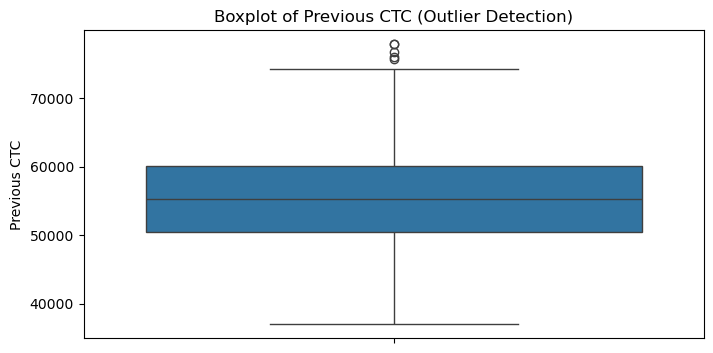

In [29]:
# 3. Boxplot for Previous CTC to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=ml_data, y='Previous_CTC')
plt.title('Boxplot of Previous CTC (Outlier Detection)')
plt.ylabel('Previous CTC')
plt.show()

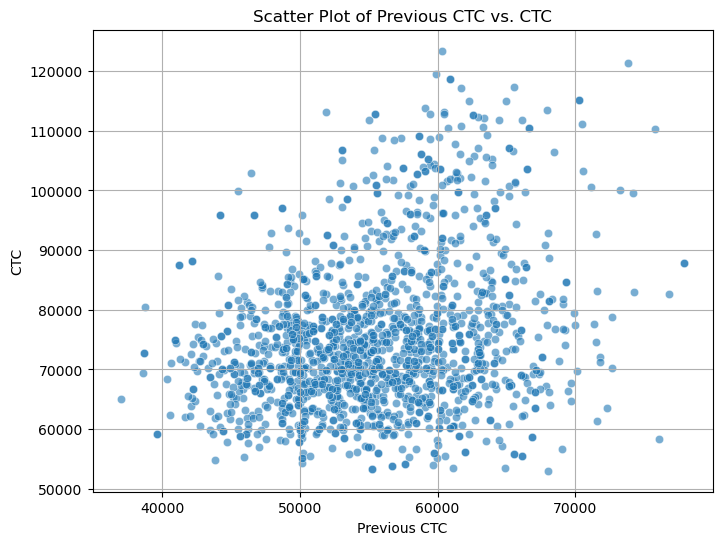

In [30]:
# Scatter plot to visualize the relationship between Previous CTC and CTC
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ml_data, x='Previous_CTC', y='CTC', alpha=0.6)
plt.title('Scatter Plot of Previous CTC vs. CTC')
plt.xlabel('Previous CTC')
plt.ylabel('CTC')
plt.grid(True)
plt.show()


# Checking for the outliers

In [32]:
# Calculate Q1 and Q3
Q1 = ml_data['Previous_CTC'].quantile(0.25)
Q3 = ml_data['Previous_CTC'].quantile(0.75)
IQR = Q3 - Q1


In [33]:
# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [34]:
# Identify outliers
outliers = ml_data[(ml_data['Previous_CTC'] < lower_bound) | (ml_data['Previous_CTC'] > upper_bound)]

In [35]:
# Print outlier data
print("Outliers in Previous CTC:")
print(outliers)
print(f"\nNumber of outliers: {len(outliers)}")

Outliers in Previous CTC:
      College  City  Previous_CTC  Previous_job_change  Graduation_Marks  \
116         3     1         77911                    1                50   
860         1     1         75785                    4                63   
1088        3     1         76815                    4                75   
1317        1     0         76070                    2                54   
1454        1     1         77911                    1                50   

      EXP_Month     CTC  Role_Manager  
116          58   87831             0  
860          37  110338             1  
1088         52   82684             0  
1317         18   58309             0  
1454         58   87831             0  

Number of outliers: 5


# Feature Engineering

In [37]:
# Calculate the correlation matrix
correlation_matrix = ml_data.corr()

# Display the correlation of features with CTC
print(correlation_matrix['CTC'].sort_values(ascending=False))


CTC                    1.000000
Role_Manager           0.621310
EXP_Month              0.301117
Previous_CTC           0.257998
Previous_job_change    0.011370
Graduation_Marks      -0.005449
City                  -0.020365
College               -0.029592
Name: CTC, dtype: float64


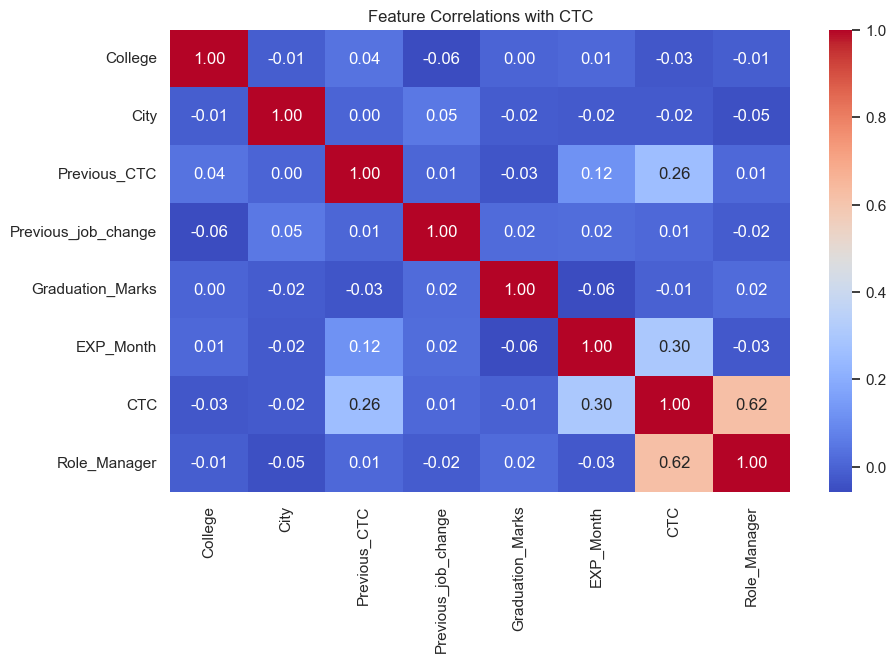

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set(style='whitegrid')

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations with CTC')
plt.show()


The correlation matrix revealed that 'Role_Manager' had the highest positive correlation with CTC, followed by 'EXP_Month' and 'Previous_CTC', indicating these features have significant predictive power for salary.

# Principle Component Analysis (PCA)


In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
features = ml_data.drop(columns=['CTC'])

In [43]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [44]:
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

In [45]:
explained_variance = pca.explained_variance_ratio_

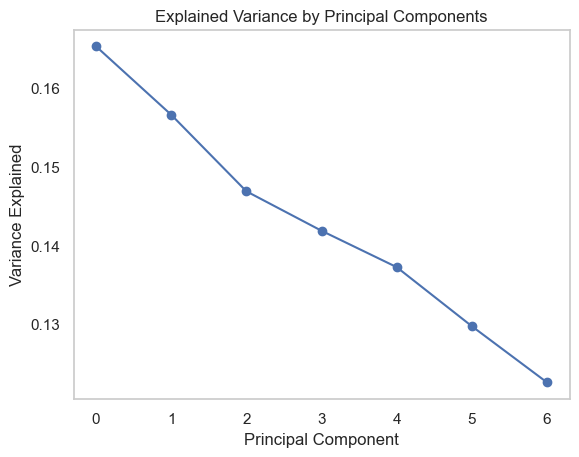

In [46]:
plt.plot(explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

The plot of explained variance by principal components showed that the first few components capture the majority of the variance in the data, indicating effective dimensionality reduction.

# Splitting Training and Testing Data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = ml_data.drop(columns=['CTC'])
y = ml_data['CTC']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1271, 7) (1271,)
(318, 7) (318,)


# Model Selection and Evaluation

### Model Selection

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [56]:
# Optional: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor()
}

### Model Evaluation

In [59]:
results = []

In [60]:
# Step 4: Loop through the models, train and evaluate each
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results as a dictionary
    results.append({
        "Model": name,
        "MSE": mse,
        "R-squared": r2
    })

In [61]:
# Step 5: Create a DataFrame for results
results_df = pd.DataFrame(results)

In [62]:
# Display results
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                       Model           MSE  R-squared
0          Linear Regression  6.891017e+07   0.535597
1              Decision Tree  9.613695e+07   0.352110
2              Random Forest  5.165695e+07   0.651871
3          Gradient Boosting  5.805012e+07   0.608786
4  Support Vector Regression  1.539605e+08  -0.037578
5                    XGBoost  5.742515e+07   0.612998


# Model Selection and Comparison

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Support Vector Regression'),
  Text(5, 0, 'XGBoost')])

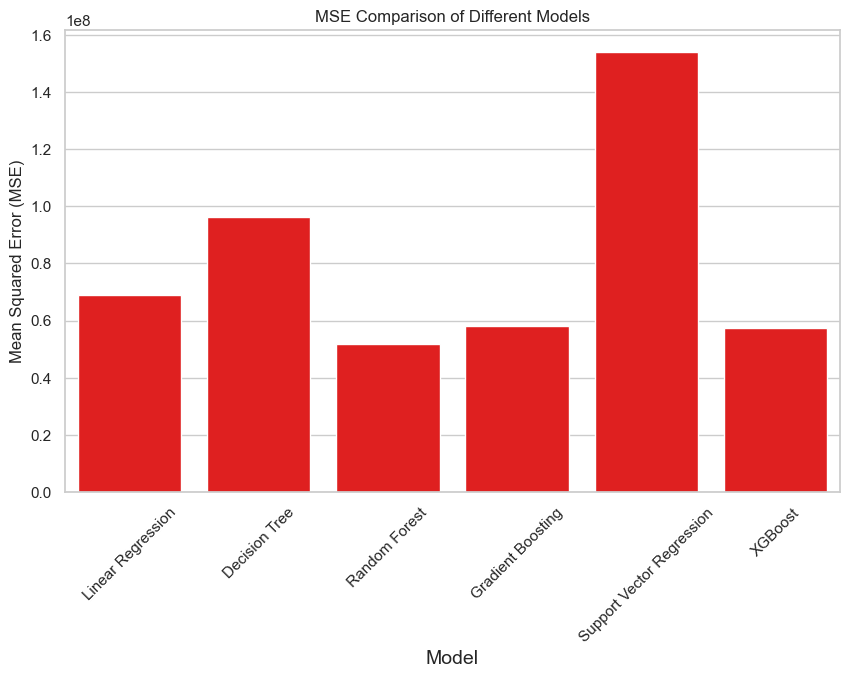

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df, color = 'red')
plt.title('MSE Comparison of Different Models')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)


- The bar plot visually compares the Mean Squared Error (MSE) of different models, highlighting the performance differences, with lower MSE indicating better model accuracy
- Selecting Random Forest as it has the lowest R-Squared value.

# Fine Tuning

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


- A parameter grid for the Random Forest model was defined, specifying various options for `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_features` to optimize model performance through GridSearchCV.

In [70]:
rf = RandomForestRegressor(random_state=0)

In [71]:
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=0,
    n_jobs=-1
)

- We utilized RandomizedSearchCV to perform random search over the defined parameter grid for the Random Forest model, optimizing for negative mean squared error (MSE) with 5-fold cross-validation, testing 20 different parameter combinations while utilizing all available CPU cores for efficiency.

In [73]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [74]:
print(f"Best Hyperparameters: {random_search_rf.best_params_}")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


- The optimal hyperparameters for the Random Forest model are: 100 trees, a maximum depth of 10, and the square root of features considered at each split. These parameters aim to enhance model performance while minimizing overfitting.

In [76]:
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

- The best Random Forest model was selected using the hyperparameters found through random search, and predictions were made on the test dataset using this optimized model.

In [78]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [79]:
print(f"Fine-tuned Random Forest MSE: {mse_rf}")
print(f"Fine-tuned Random Forest R-squared: {r2_rf}")

Fine-tuned Random Forest MSE: 54087515.589026526
Fine-tuned Random Forest R-squared: 0.6354909846612409


In [80]:
import numpy as np
accuracy = np.mean(np.abs((y_pred_rf - y_test) / y_test) <= 0.10)

In [81]:
accuracy

0.710691823899371

# Saving the model

In [83]:
import joblib
joblib.dump(best_rf, 'fine_tuned_random_forest_model.pkl')

['fine_tuned_random_forest_model.pkl']

# Predicted vs Actual CTC

Red Dashed Line represents perfect predictions.

The predictions for these points are very accurate since the predicted values are nearly the same as the actual values.

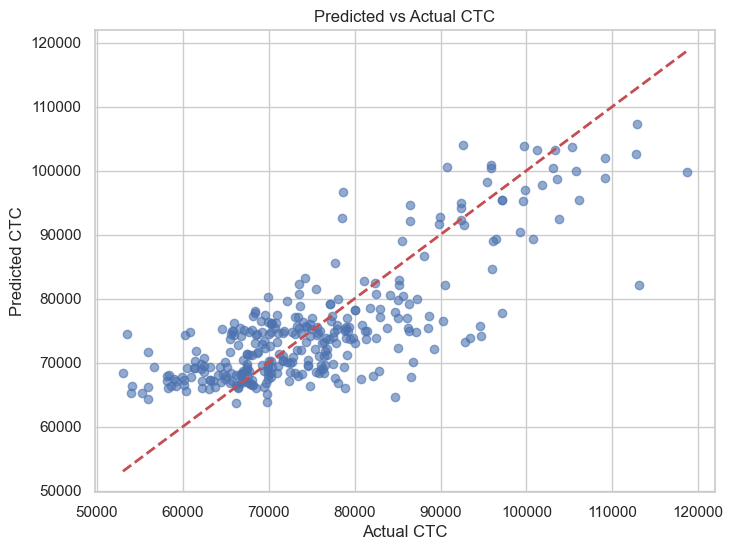

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual CTC')
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.grid(True)
plt.show()

- A scatter plot was created to visualize the **Predicted vs Actual CTC** values, helping to assess the model's performance. The red dashed line represents perfect predictions, indicating where the predicted values match the actual values.

# Questions regarding this project

### 1) Your views about the problem statement?
- The task is to predict the salaries of employees based on certain factors like college tier, city, role, experience and previous ctc. It is problem with continuous output so it can be easily solved by using regression models. The code also shows the necessity of good data pre-processing practices as categorical problems and outliers might block optimal performance of the model.

### 2) Apporach for this project?
- The steps I took to solve the task are as follows: First, I proceeded with data preprocessing; this involved cleaning of the dataset, and since College, City, and Role are categorical variables, I transformed them into numerical values. This was important to enable the machine learning models to analyze the data as required.
- I also dealt with missing values by imputation and excluded outliers using the Interquartile Range (IQR) method to make the data more accurate.
- After data cleaning, I proceeded with exploratory data analysis (EDA) with the help of which I created visual representations of the data and their correlation.
- After this, I moved to the modeling phase, where I compared multiple regression models: Linear Regression, Decision Trees, and Random Forest.
- Lastly, I selected Random Forest as the most accurate model and then tuned the hyperparameters of the model with RandomizedSearchCV.

### 3) What were the available ML model options you had to perform this task?
- The available ML models considered for this task were Linear Regression, Decision Tree, Random Forest, Gradient Boosting, Support Vector Regression, and XGBoost.

### 4) Which model’s performance is best and what could be the possible reason for that?
- The Random Forest Regressor performed the best, with the lowest MSE and highest R-squared score compared to the Linear Regression and Decision Tree models.

### 5) What steps can you take to improve this selected model’s performance even further?- Feature engineering could reveal further patterns by deriving interaction features or additional variables. Moreover, the fine-tuning of the model can be done using the GridSearchCV for hyperparameters optimization.
- It is also important to try other ensemble methods like Gradient Boosting or XGBoost which might give a better accuracy.
- Lastly, collecting more data or using additional sources (for example, trends in salaries in a certain city or for a certain position) could enhance generalization.

I feel that these approaches can help to imporve the performance of the currenct model
